# 複数カメラを使った同時・同期撮影をする


In [1]:
from uikit.ui_uiview import *
# ビデオ画像のリアルタイム取得を行うためのモジュール
from avfoundation.video_capture_ex_multi import *
import time

# 画面サイズを取得する
size = get_screen_bounds().size
# プレビュー表示用のUIViewを作成する
ui_view = create_uiview(
    rect=CGRect( CGPoint(size.width/4/2, size.height/4/2),
                 CGSize(3*size.width/4,  3*size.height/4) ),
    name='sample',
    color=UIColor.color(red=0,green=0,blue=0,alpha=1) )

In [2]:
import copy

# 撮影に使うカメラ（3台まで）
cameras = [
{'type':AVCaptureDeviceTypeBuiltInWideAngleCamera,
 'pos':AVCaptureDevicePositionBack,
 'pixFormType':CV32BGRA,
 'format':"1280x 720"},
{'type':AVCaptureDeviceTypeBuiltInUltraWideCamera,
 'pos':AVCaptureDevicePositionBack,
 'pixFormType':CV32BGRA,
 'format':"1280x 720"},
{'type':AVCaptureDeviceTypeBuiltInTelephotoCamera,
 'pos':AVCaptureDevicePositionBack,
 'pixFormType':CV32BGRA,
 'format':"1280x 720"} ]

# 色画像・距離画像を入れるリストを用意
video = {AVCaptureDeviceTypeBuiltInWideAngleCamera:[],
         AVCaptureDeviceTypeBuiltInUltraWideCamera:[],
         AVCaptureDeviceTypeBuiltInTelephotoCamera:[] }

# numpyアレイとしてカメラ画像が渡されると
# リストに追加する
def process_image( image ): 
    video[ image['type'] ].append( image['video'] )

AVCaptureVideoCaptureEx_ = AVCaptureVideoCaptureExMulti(
        cameras, # 撮影に使うカメラ（3台まで）
        #None,             # 取得画像サイズ AVCaptureSessionPreset640x480
        process_image,           # 取得画像を使った処理を行うユーザ関数
        None,                   # UIViewへの表示画像を生成するユーザ関数
        ui_view )               # 取得画像を表示するUIView


MultiCam is Supported.


In [3]:
# 撮影開始
AVCaptureVideoCaptureEx_.video_shooting_start(0.1) # 撮影インターバルを秒で指定
time.sleep(4) # 2秒間にわたり撮影を行う
# 撮影を終了する
AVCaptureVideoCaptureEx_.video_shooting_close(ui_view)

In [4]:
# 取得した画像の枚数
l = len(video[AVCaptureDeviceTypeBuiltInWideAngleCamera])
print("{:d} images are captured.".format(l))

# 取得した画像の枚数
l = len(video[AVCaptureDeviceTypeBuiltInUltraWideCamera])
print("{:d} images are captured.".format(l))

# 取得した画像の枚数
l = len(video[AVCaptureDeviceTypeBuiltInTelephotoCamera])
print("{:d} images are captured.".format(l))

6 images are captured.
5 images are captured.
5 images are captured.


In [5]:
# 取得した画像の縦・横サイズ
video_h, video_w = video[AVCaptureDeviceTypeBuiltInWideAngleCamera][0].shape
print("image: height:{:d} pixels x width:{:d} pixels".format(video_h, video_w))

# 取得した画像の縦・横サイズ
video_h, video_w = video[AVCaptureDeviceTypeBuiltInUltraWideCamera][0].shape
print("image: height:{:d} pixels x width:{:d} pixels".format(video_h, video_w))

# 取得した画像の縦・横サイズ
video_h, video_w = video[AVCaptureDeviceTypeBuiltInTelephotoCamera][0].shape
print("image: height:{:d} pixels x width:{:d} pixels".format(video_h, video_w))

image: height:720 pixels x width:5120 pixels
image: height:720 pixels x width:5120 pixels
image: height:720 pixels x width:5120 pixels


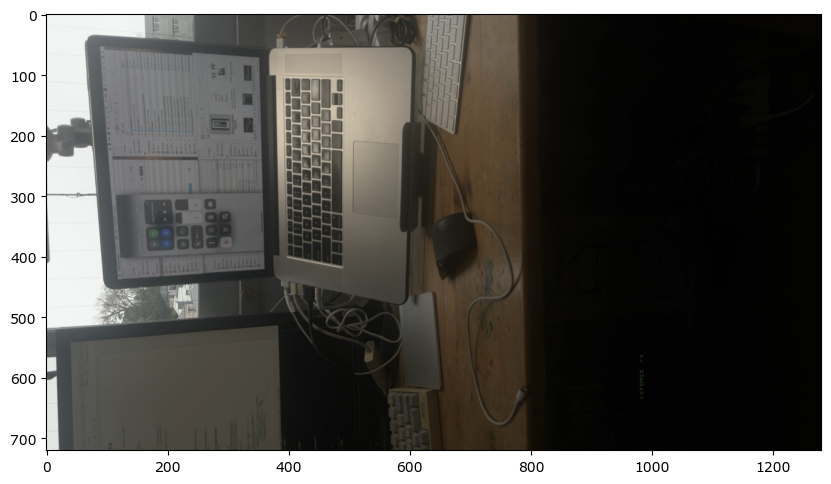

In [6]:
# matplotlibを使って画像を表示する
from matplotlib import pylab as plt
import cv2

plt.figure(figsize=[10,10])
rgba_image = cv2.cvtColor( 
    video[AVCaptureDeviceTypeBuiltInWideAngleCamera][0].reshape(video_h, int(video_w/4), 4), 
    cv2.COLOR_RGBA2BGRA)
plt.imshow(rgba_image)

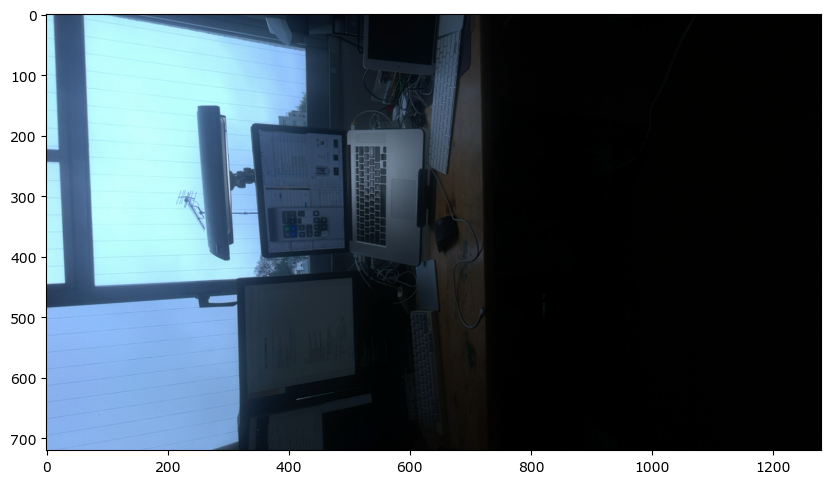

In [7]:
plt.figure(figsize=[10,10])
rgba_image = cv2.cvtColor( 
    video[AVCaptureDeviceTypeBuiltInUltraWideCamera][0].reshape(video_h, int(video_w/4), 4), 
    cv2.COLOR_RGBA2BGRA)
plt.imshow(rgba_image)

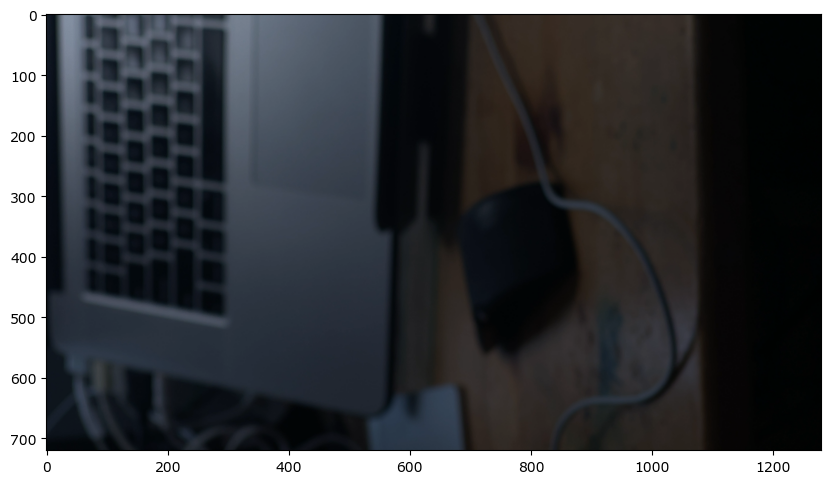

In [8]:
plt.figure(figsize=[10,10])
rgba_image = cv2.cvtColor( 
    video[AVCaptureDeviceTypeBuiltInTelephotoCamera][0].reshape(video_h, int(video_w/4), 4), 
    cv2.COLOR_RGBA2BGRA)
plt.imshow(rgba_image)